   # The Dynamic Structure Analysis based on Numerical Method

## Introduction:

The project comes from a real physical phenomenon. We use cars everyday. When a car is running on the rough road, we may feel uncomfortable because of the vibration of car body. Actually, the suspension is the most important link between the ground and the car body structure and the mechanical properity of the suspension determinates the comfort of the riding comfortability. 

If you are still confused about that, you can watch the video below:

In [57]:
from IPython.display import YouTubeVideo
YouTubeVideo('EbkWaNDyFOQ')

Specificallly, the intreasting video at time 3:00 shows an experiment related to damping property effecting on the performance on the car.

Thus, to make clear what effects the riding comfortabiltity, the academic simulation needs to be done.

For the project, the Numerical Method(Euler Metod) combined with the Finite Element Method was used to simulate the
real physical phenomenon.

Specifically,the structure was modeled by Finite Element Method and the equations were solved by numerical method.

The picture below is the structure modeled by Finite Element Method, you can see I have 12 nodes each of which has three degree of freedoms X, Y, Z and the Load(1N) are appled on the y direction of node 4, 5, 11, 12:

![Image](./figures/F1.png)
#### Figure 1. To simplify the model, only two elements were used


Equation One:
\begin{equation}
M  \ddot{U}(t)+C \dot{U}(t)+K U(t)= F(t)  --(1)
\end{equation}

Note: The equation has damping cofficiency C and it indicates the masteril is the viscoelastic solid.Specifically, "Visco" is damping property.

***Phyical explaination***: If we suddently seat into a car and the suspension of the car with the properity damping cofficiency(C), we can feel the car will vibrate, the amplitude of the vibration will decrease graduatlly and finally the car will stop vibrate. That means  becuase of the damping cofficiency C, the damping properity of suspensition can damp out the energy. 

The video below at time  16:00  shows the phenomenon and the solution.

In [58]:
from IPython.display import YouTubeVideo
YouTubeVideo('4dL9kFjfizY')

Equation two:
    
\begin{equation}
M  \ddot{U}(t)+K U(t)= F(t)  --(2)
\end{equation}

Note: The equation do not have the damping cofficiency C and indicates the masteirl is purely elastic.Specifically, "elastic" means there is no disspation properity in structure and any point of the mateiral has the potential to come back its original place.

***Phyical explaination***: If we suddently seat into a car and the suspensition of the car without the properity damping cofficiency(C), theorically, the car will not stop vibrate. That means the enery conservation.

The video below at time  12:00  shows the phenomenon and the solution.

In [59]:
from IPython.display import YouTubeVideo
YouTubeVideo('4dL9kFjfizY')

## Eurler Method:
The method is the basic method in the numerial method and the specifical introduction can be found at the website(https://en.wikipedia.org/wiki/Euler_method)

Also you can watch the video below:

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('RGtCw5E7gBc')

\begin{equation}
F_{n}=\frac{\partial U_{n}}{\partial t}
\end{equation}

\begin{equation}
U_{n+1}=U_{n}+dt*F_{n}
\end{equation}

Specifically, ***for the structure with the damping properity***, to use the numerical method, the dynamic equation can be processed in the following way:

\begin{equation}
    \dot{U}(t)=V(t)\\
    \dot{V}(t)=M^{-1}(F-KU(t)-CV(t))
\end{equation}   


The matrix form:
\begin{align}
\frac{\partial }{\partial t}&
\begin{pmatrix} U \\V \end{pmatrix}
= \begin{pmatrix} \ 0 \ \quad I \\ -M^{-1}K\ \quad-M^{-1}{C}   \end{pmatrix}&\begin{pmatrix} U \\V \end{pmatrix}&
+\begin{pmatrix} \ 0  \\ M^{-1}F\   \end{pmatrix}
\end{align}

In addition, ***for the structure without hte damping properity***, we just let the C become a zero matrix.

## Simulation Result:
#### The simulation for the structure with the damping (The code to get the result is from the coding part) is:    
####    Note: The displacement in the y direction of the node 11 has been extracted to generate the graph.

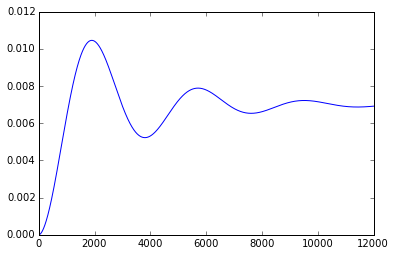

In [51]:
from matplotlib import pyplot  
pyplot.plot(sh.transpose());


#### Figure 2. the displacement of the y direction of the No. 11 node. 

***The interpreation of the Figure 2:***

As we can see in the graph, the line of  simulation rsult calculatd by Numerical Method combined with Finite Element
Method agrees with the following evidence:


First: the physical pheonment "if we suddently seat into a car and the suspensition of the car with the 
properity damping cofficiency(C), we can feel the car will vibrate, the amplitude of the vibration will decrease 
graduatlly and finally the car will stop vibrate".

Second: the actual experiment is from the video(https://www.youtube.com/watch?v=EbkWaNDyFOQ) at 
time 3:34.

#### The simulation for the structure without the damping(The code to get the result is from the coding part) is:

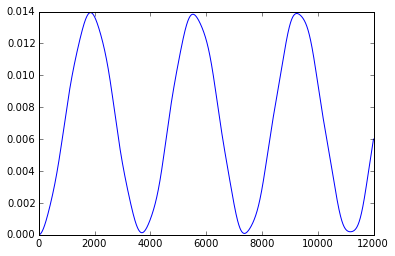

In [52]:
pyplot.plot(ssh.transpose());

#### Figure 3. the displacement of the y direction of the No. 11 node. 

***The interpreation of the Figure 3:***

As we can see in the graph, the line of  simulation rsult calculatd by Numerical Method combined with Finite Element
Method agree with the following evidence:

First: the physical pheonment "Phyical explaination: If we suddently seat into a car and the suspensition of the car without the properity damping cofficiency(C). Theorically, the car will not stop vibrate. That means the enery conservation.".

Second: the actual experiment is from the video(https://www.youtube.com/watch?v=-qRYaZP0938) 

## Analytical Result:

\begin{equation}
x(t)=\frac{F}{K} \begin{pmatrix}  1- \frac{e^{- \varepsilon \omega t}  cos(\omega_{d}t-\psi)}  {\sqrt{1-\varepsilon^2} \qquad }   \end{pmatrix}
\end{equation}

In [3]:
import numpy
from sympy import *
init_printing(use_unicode=True)
import scipy.integrate
from matplotlib import pyplot  
%matplotlib inline

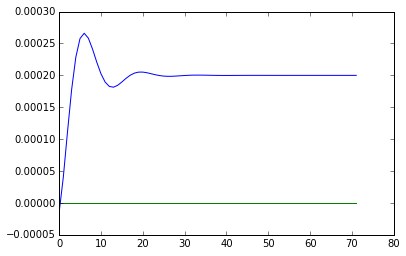

In [5]:

F=1
possion=0.45
young=10000
K=(1/2)*young
M=2
C=0.015*K+0.001*M
w=(K/M)**0.5
eps=C/(2*M*w)
#eps=0
wd=w*(1-eps**2)**0.5
#print(K)
#print(C)
#print(eps)

b=zeros(72)
dt=0.00006;
N=12000
t=dt*N
#print(t)

for i in range(0,72):
    t=i
    t=t/100 
    x=(F/K)*(1-(2.7**(-eps*w*t))*cos(wd*t)/(1-eps**2)**0.5)
    b[i]=x
    
pyplot.plot(b.transpose()); 

In [ ]:
As you can see in th graph, the displacement of the y of the node 11 in analytical result is much smaller that in 
numerical result. 

1.The main reason is that because of the low performace of this computer, only two elements have been
model buy the fintie element method. Actually, a large number of elements need to be modeled to get an accurate 
result. 

2. Also, the small strain theory was used to derive the fintie element equations. 


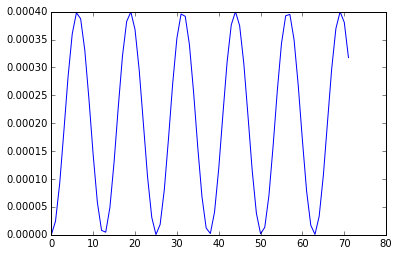

In [6]:
F=1
possion=0.45
young=10000
K=(1/2)*young
M=2
C=0.015*K+0.001*M
w=(K/M)**0.5
#eps=C/(2*M*w)
eps=0
wd=w*(1-eps**2)**0.5
#print(K)
#print(C)
#print(eps)

b=zeros(72)
dt=0.00006;
N=12000
t=dt*N
#print(t)

for i in range(0,72):
    t=i
    t=t/100 
    x=(F/K)*(1-(2.7**(-eps*w*t))*cos(wd*t)/(1-eps**2)**0.5)
    b[i]=x
    
pyplot.plot(b.transpose()); 


## The Finite Element Method 

### 1 The Dynamic Equation(Newton's Law):

\begin{equation}
M  \ddot{U}(t)+C \dot{U}(t)+K U(t)= F(t)  --(3)
\end{equation}

Sepcifically: 

The Mass Matrix:
\begin{equation}
M_{\alpha \beta}=\int_{\text{v}}\rho \ N_{i\alpha} N_{i\beta}dV--(4)
\end{equation}

The Damping Matrix:
\begin{equation}
C_{\alpha \beta}=\int_{\text{v}}a_{ijmn} \ B_{ij\alpha} B_{mn\beta}dV--(5)
\end{equation}

The Stiffness Matrix:
\begin{equation}
K_{\alpha \beta}=\int_{\text{v}}A_{ijmn} \ B_{ij\alpha} B_{mn\beta}dV--(6)
\end{equation}

\begin{equation}
B_{ija}=\frac{\partial B_{i\alpha}}{\partial \xi_{k}}\frac{\partial \xi_{k}}{\partial X_{j}}--(7)
\end{equation}


\begin{equation}
Jacobin=\frac{\partial \xi_{k}}{\partial X_{j}}--(8)
\end{equation}

The Shape Funtion--(9):

\begin{equation}
N1=(1-r)(1-s)(1+t)/8
\end{equation}
\begin{equation}
N2=(1+r)(1-s)(1+t)/8
\end{equation}
\begin{equation}
N3=(1+r)(1+s)(1+t)/8
\end{equation}
\begin{equation}
N4=(1-r)(1+s)(1+t)/8
\end{equation}
\begin{equation}
N5=(1-r)(1-s)(1-t)/8
\end{equation}
\begin{equation}
N6=(1+r)(1-s)(1-t)/8
\end{equation}
\begin{equation}
N7=(1+r)(1+s)(1-t)/8
\end{equation}
\begin{equation}
N6=(1-r)(1+s)(1-t)/8
\end{equation}

How we can discrete the displacement by the eight nodes:

Matrix Form:

\begin{align}
\begin{pmatrix} X \\ Y \\ Z  \end{pmatrix} =
&  \begin{pmatrix}
N1\ 0\ 0\ N2\ 0\ 0\ N3\ 0\ 0\ N4\ 0\ 0\ N5\ 0\ 0\ N6\ 0\ 0\ N7\ 0\ 0\ N8\ 0\ 0\\0\ N1\ 0\ 0\ N2\ 0\ 0\ N3\ 0\ 0\ N4\ 0\ 0\ N5\ 0\ 0\ N6\ 0\ 0\ N7\ 0\ 0\ N8\ 0\\0\ 0\ N1\ 0\ 0\ N2\ 0\ 0\ N3\ 0\ 0\ N4\ 0\ 0\ N5\ 0\ 0\ N6\ 0\ 0\ N7\ 0\ 0\ N8
\end{pmatrix}&* \begin{pmatrix} X1\\ Y1\\ Z1\\ X2\\ Y2\\ Z2\\ X3\\ Y3\\ Z3\\ X4\\ Y4\\ Z4 \\ X5\\ Y5\\ Z5\\ X6\\ Y6\\ Z6\\ X7\\ Y7\\ Z7\\ X8\\ Y8\\ Z8\end{pmatrix}--(10).
\end{align}

Summation Form:

$$X_{i}=\sum_{\alpha=1}^{24} N_{i\alpha}X_{\alpha}--(11)$$
$$Y_{i}=\sum_{\alpha=1}^{24} N_{i\alpha}Y_{\alpha}--(12)$$
$$Z_{i}=\sum_{\alpha=1}^{24} N_{i\alpha}Z_{\alpha}--(13)$$

==>
\begin{equation}
X=N1*X1+N2*X2+N3*X3+N4*X4+N5*X5+N6*X6+N7*X7+N8*X8--(14)
\end{equation}
\begin{equation}
Y=N1*Y1+N2*Y2+N3*Y3+N4*Y4+N5*Y5+N6*Y6+N7*Y7+N8*Y8--(15)
\end{equation}
\begin{equation}
Z=N1*Z1+N2*Z2+N3*Z3+N4*Z4+N5*Z5+N6*Z6+N7*Z7+N8*Y8--(16)
\end{equation}

Jabian Matrix:

\begin{align}
J& = \begin{pmatrix} \frac{\partial X}{\partial r} \ \frac{\partial Y}{\partial r}\ \frac{\partial Z}{\partial r} \\  \frac{\partial X}{\partial s} \ \frac{\partial Y}{\partial s}\ \frac{\partial Z}{\partial s}\\   \frac{\partial X}{\partial t} \ \frac{\partial Y}{\partial t}\ \frac{\partial Z}{\partial t}\end{pmatrix}--(17)
\end{align}

### 2 The Process of how we use the Linear monentum equation to derive the Finite Element equations:

\begin{equation}
\rho \ddot{u}_{i} -\rho \ f_{i} -t_{ji,j}=0--(18)
\end{equation}

#### 2.1 Apply the virtual displacement to the equilibrium equation:
\begin{equation}
\int_{\text{v}}    (t_{ji,j}+\rho \ f_{i} -\rho \ddot{u}_{i})  \delta\ u_{i}    dV=0--(19)
\end{equation}

#### 2.2 Process the last term:

\begin{equation}
\int_{\text{v}}    \rho \ f_{i} \delta\ u_{i}    dV--(20)
\end{equation}

\begin{equation}
\delta\ u_{i} = \ N_{i\alpha}\delta \ U_{\alpha}   --(21)
\end{equation}


\begin{equation}
\int_{\text{v}}    \rho\ f_{i} \delta\ u_{i}    dV
=\int_{\text{v}}    \rho\ f_{i} \ N_{i\alpha}\delta \ U_{\alpha}    dV
=\delta \ U_{\alpha}\int_{\text{v}}    \rho\ f_{i} \ N_{i\alpha}    dV
=\delta \ U_{\alpha}\ F_{\alpha}^1--(22)
\end{equation}

\begin{equation}
\int_{\text{v}}    \rho\ f_{i} \ N_{i\alpha}    dV
=\ F_{\alpha}^1--(23)
\end{equation}

#### 2.3 Process the second term:
\begin{equation}
\int_{\text{v}}  \rho \ddot{u}_{i} \delta\ u_{i} dV--(24)
\end{equation}

\begin{equation}
\ddot{u} = \ N_{i \beta} \delta \ U_{\beta}   --(25)
\end{equation}

\begin{equation}
\delta \ u_{i}=N_{i\alpha}\delta \ U_{\alpha}   --(26)
\end{equation}


\begin{equation}
\int_{\text{v}}  \rho \ddot{u}_{i} \delta\ u_{i} dV
=\int_{\text{v}}    \rho\ N_{i\beta}\ddot{U}_{\beta} \ N_{i\alpha}\delta \ U_{\alpha}    dV
= \delta \ U_{\alpha}\ddot{U}_{\beta}\int_{\text{v}}   \rho\ N_{i\beta}\  N_{i\alpha}    dV
=\delta \ U_{\alpha}\ddot{U}_{\beta}\ M_{\alpha\beta}--(27)
\end{equation}


\begin{equation}
\int_{\text{v}}   \rho\ N_{i\beta}\  N_{i\alpha}    dV
=\ M_{\alpha\beta}--(28)
\end{equation}

#### 2.4 Process the first term:

\begin{equation}
\int_{\text{v}}    t_{ji,j} \delta\ u_{i}    dV
=\int_{\text{v}}    (t_{ji,j} \delta\ u_{i})_{,j}-\ t_{ji,j} (\delta \ u_{i})_{,j} dV\\
=\oint_{\text{v}}   t_{ji,j} \delta\ u_{i}\ n_{j}dS- \int_{\text{v}}\ t_{ji} \delta \ e_{ij} dV\\
=\oint_{\text{sa}}   t_{ji,j} \ n_{j}  \delta\ u_{i} dS
+\oint_{\text{sb}}   t_{ji,j} \ n_{j}  \delta\ u_{i} dS
-\int_{\text{v}}   t_{ji} \delta \ e_{ij} dV\\
=\oint_{\text{sa}}   t_{ji,j} \ n_{j}  \delta\ u_{i} dS
-\int_{\text{v}}   t_{ji} \delta \ e_{ij} dV\\
=\oint_{\text{sa}}   t_{i}^*  \delta\ u_{i} dS
- \delta\ N_{\alpha} \int_{\text{v}} \ t_{ij}\ B_{ij\alpha} dV\\
=\oint_{\text{sa}}   t_{i}^*  \ N_{i\alpha}\delta\ U_{\alpha} dS
- \delta\ N_{\alpha} \int_{\text{v}} \ t_{ij}\ B_{ij\alpha} dV\\
=\delta\ U_{\alpha}\oint_{\text{sa}}   t_{i}^*  \ N_{i\alpha}  dS
- \delta\ N_{\alpha} \int_{\text{v}} \ t_{ij}\ B_{ij\alpha} dV\\
=\delta\ U_{\alpha}\ F_{\alpha}^2-\delta\ U_{\alpha}\ F_{\alpha}^3--(29)
\end{equation}

\begin{equation}
F_{\alpha}^2 \quad is \quad due \quad to \quad surface \quad traction
\end{equation}
\begin{equation}
F_{\alpha}^3 \quad is \quad due \quad to \quad internalaction
\end{equation}

The detail: parameter relation for the equation above

\begin{equation}
u_{i,j}=B_{ij\alpha}U_{\alpha}--(30)
\end{equation}
\begin{equation}
e_{ij}=0.5(B_{ij\alpha}+B_{ij\alpha})U_{\alpha}--(31)
\end{equation}
\begin{equation}
t_{ji} \delta\ e_{ij}=t_{ji} \delta\ u_{i,j}--(32)
\end{equation}
\begin{equation}
t_{ji} \delta\ e_{ij}=t_{ij} \ B_{ij\alpha}\delta\ U_{\alpha}--(33)
\end{equation}
\begin{equation}
e_{mn} =B_{mn\beta}\ U_{\beta}--(34)
\end{equation}
\begin{equation}
\dot{e}_{mn} =B_{mn\beta}\ \dot{U}_{\beta}--(35)
\end{equation}

Note: we use the small strain theory:
\begin{equation}
e_{ij}=0.5(u_{i,j}+u_{j,i})--(36)
\end{equation}




Stress:the first term is initial stress, the second term is the thermal stress, the forth term is elastic stress and the last term is the damping stress
\begin{equation}    
t_{ij}=\alpha_{ji}+ \beta_{ji}T+A_{jimn}e_{mn}+a_{jimn}\dot{e}_{mn}--(37)
\end{equation}

Now we can get the discreted form internalaction:

\begin{equation}   
F_{\alpha}^3=\int_{\text{v}}   t_{ij}\ B_{ij\alpha}    dV=
\int_{\text{v}}   \alpha_{ij}\ B_{ij\alpha}    dV
-T_{q}\int_{\text{v}}  \beta_{ji} \ N_{q}\ B_{ij\alpha} dV
+U_{ \beta} \int_{\text{v}}  A_{jimn}\  B_{ij\alpha}\ B_{mn\beta}dV
+U_{ \beta} \int_{\text{v}}  a_{jimn}\  B_{ij\alpha}\ B_{mn\beta}dV\\
=F_{\alpha}^4-T_{q}P_{\alpha q}+U_{\beta}K_{\alpha\beta}+\dot{U}_{\beta}C_{\alpha\beta}--(38)
\end{equation}

Specifically:

\begin{equation} 
\int_{\text{v}}   \alpha_{ij}\ B_{ij\alpha}    dV=F_{\alpha}^4
\end{equation}
\begin{equation} 
\int_{\text{v}}  \beta_{ji} \ N_{q}\ B_{ij\alpha} dV=P_{\alpha q}
\end{equation}
\begin{equation} 
\int_{\text{v}}  A_{jimn}\  B_{ij\alpha}\ B_{mn\beta}dV=K_{\alpha\beta}
\end{equation}
\begin{equation} 
\int_{\text{v}}  a_{jimn}\  B_{ij\alpha}\ B_{mn\beta}dV=C_{\alpha\beta}
\end{equation}



The discrete form of initial stress:
\begin{equation} 
\int_{\text{v}}   \alpha_{ij}\ B_{ij\alpha}    dV=F_{\alpha}^4
\end{equation}

The discrete form of thermal stress:
\begin{equation} 
\int_{\text{v}}  \beta_{ji} \ N_{q}\ B_{ij\alpha} dV=P_{\alpha q}
\end{equation}

The discrete form of elastic stress:
\begin{equation} 
\int_{\text{v}}  A_{jimn}\  B_{ij\alpha}\ B_{mn\beta}dV=K_{\alpha\beta}
\end{equation}

The discrete form of damping stress:
\begin{equation} 
\int_{\text{v}}  a_{jimn}\  B_{ij\alpha}\ B_{mn\beta}dV=C_{\alpha\beta}
\end{equation}

As a reuslt:
\begin{equation}     
F_{\alpha}^3=F_{\alpha}^4-T_{q}P_{\alpha q}+U_{\beta}K_{\alpha\beta}+\dot{U}_{\beta}C_{\alpha\beta}--(39)
\end{equation}    

#### 2.5  The process of hwo we get the final Finite Element Method equation, which we can use to make a program:
\begin{equation}   
\delta\ U_{\alpha}\ F_{\alpha}^1+\delta\ U_{\alpha}\ \ddot{U}_{\beta}\ M_{\alpha\beta}+
\delta\ U_{\alpha}\ F_{\alpha}^2-\delta\ U_{\alpha}\ F_{\alpha}^3=0--(40)
\end{equation}


\begin{equation}   
\delta\ U_{\alpha} (M_{\alpha\beta}\ddot{U}_{\beta}+\ F_{\alpha}^3-\ F_{\alpha}^1-\ F_{\alpha}^2)=0
\end{equation}

\begin{equation}   
M_{\alpha\beta}\ddot{U}_{\beta}+\ F_{\alpha}^3-\ F_{\alpha}^1-\ F_{\alpha}^2=0
\end{equation}

\begin{equation}   
M_{\alpha\beta}\ddot{U}_{\beta}+\ F_{\alpha}^3=\ F_{\alpha}^1+\ F_{\alpha}^2
\end{equation}

Mass Matrix
\begin{equation}   
M_{\alpha\beta}\ddot{U}_{\beta} 
\end{equation}

Internal Internaction
\begin{equation}   
F_{\alpha}^3 
\end{equation}


Body Force
\begin{equation}   
F_{\alpha}^1
\end{equation}

Surface Traction
\begin{equation}   
F_{\alpha}^2
\end{equation}


\begin{equation}   
M_{\alpha\beta}\ddot{U}_+ C_{\alpha\beta}\dot{U}_{\beta}+ K_{\alpha\beta}U_{\beta}=T_{q}P_{\alpha q}-\ F_{\alpha}^4+  \ F_{\alpha}^1+\ F_{\alpha}^2--(41)
\end{equation}



### 3  Now let us do the Coding!



In [2]:
import numpy
from sympy import *
init_printing(use_unicode=True)
import scipy.integrate
from matplotlib import pyplot  
%matplotlib inline

In [3]:
print("The Below is for the Stiffness matrix")

The Below is for the Stiffness matrix


##### The Function "NewWayToAss" works to assemble the single matrix inlcuing Stiness Matrix, Mass Matrix, Damping Matrix into a global Stiness Matrix, Mass Matrix, Damping Matrix.

In [4]:
#--Assembel Function----Assembel Function----Assembel Function----Assembel Function----Assembel Function----Assembel Function--
def NewWayToAss(K1,S):    
        
    KK1=zeros(36,36)
    
    for i in range(24):    
    
       for j in range(24) :
            a=S[i]
            b=S[j]
            c=K1[i,j]    
            KK1[a,b]=c
        
    return KK1     

#--Assembel Function----Assembel Function----Assembel Function----Assembel Function----Assembel Function----Assembel Function--

##### The Function "GetSifnessMatrix3D" works to us the phsical coordinate of input geometery and the Youngs Module and Possional Ration to geneate the stiffness of a single matrix

In [5]:
#--Stiffness Function----Stiffness Function----Stiffness Function----Stiffness Function----Stiffness Function----Stiffness Function--
def GetStiffinessMatrix3D(X1,Y1,Z1,  X2,Y2,Z2,  X3,Y3,Z3,  X4,Y4,Z4,  X5,Y5,Z5,  X6,Y6,Z6,  X7,Y7,Z7,  X8,Y8,Z8, Young,P):
    
    a=Young
    b=P
    C = a/((1+b)*(1-2*b))*Matrix([[(1-b),     b,     b,         0,         0,         0], 
                                  [    b,  (1-b),    b,         0,         0,         0], 
                                  [    b,     b, (1-b),         0,         0,         0], 
                                  [    0,     0,     0, (1-2*b)/2,         0,         0],
                                  [    0,     0,     0,         0, (1-2*b)/2,         0], 
                                  [    0,     0,     0,         0,         0, (1-2*b)/2]])
#==================================================================================================
    Xphysical=Matrix([0,0,0,0,0,0,0,0])
    Yphysical=Matrix([0,0,0,0,0,0,0,0])
    Zphysical=Matrix([0,0,0,0,0,0,0,0])
    Xphysical[0]=X1
    Xphysical[1]=X2
    Xphysical[2]=X3
    Xphysical[3]=X4
    Xphysical[4]=X5
    Xphysical[5]=X6
    Xphysical[6]=X7
    Xphysical[7]=X8

    Yphysical[0]=Y1
    Yphysical[1]=Y2
    Yphysical[2]=Y3
    Yphysical[3]=Y4
    Yphysical[4]=Y5
    Yphysical[5]=Y6
    Yphysical[6]=Y7
    Yphysical[7]=Y8

    Zphysical[0]=Z1
    Zphysical[1]=Z2
    Zphysical[2]=Z3
    Zphysical[3]=Z4
    Zphysical[4]=Z5
    Zphysical[5]=Z6
    Zphysical[6]=Z7
    Zphysical[7]=Z8
 
    r,s,t=symbols('r s t')
    N1=0.125*(1-r)*(1-s)*(1+t)
    N2=0.125*(1+r)*(1-s)*(1+t)
    N3=0.125*(1+r)*(1+s)*(1+t)
    N4=0.125*(1-r)*(1+s)*(1+t)
    N5=0.125*(1-r)*(1-s)*(1-t)
    N6=0.125*(1+r)*(1-s)*(1-t)
    N7=0.125*(1+r)*(1+s)*(1-t)
    N8=0.125*(1-r)*(1+s)*(1-t)
    N_matrix = Matrix([[N1],[N2],[N3],[N4],[N5],[N6],[N7],[N8]])

    X=N_matrix.dot(Xphysical)
    Y=N_matrix.dot(Yphysical)
    Z=N_matrix.dot(Zphysical)

    dXdr=diff(X,r)
    dYdr=diff(Y,r)
    dZdr=diff(Z,r)

    dXds=diff(X,s)
    dYds=diff(Y,s)
    dZds=diff(Z,s)

    dXdt=diff(X,t)
    dYdt=diff(Y,t)
    dZdt=diff(Z,t)
    #----------------------
    dXdr=simplify(dXdr)
    dYdr=simplify(dYdr)
    dZdr=simplify(dZdr)

    dXds=simplify(dXds)
    dYds=simplify(dYds)
    dZds=simplify(dZds)

    dXdt=simplify(dXdt)
    dYdt=simplify(dYdt)
    dZdt=simplify(dZdt)
        
    J=Matrix([[dXdr,dYdr,dZdr],[dXds,dYds,dZds],[dXdt,dYdt,dZdt]])
   
    J_Inversed=J**-1
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++    

    New_u_Up=zeros(3,24)
    New_u_Up[0,0]=N1
    New_u_Up[0,3]=N2
    New_u_Up[0,6]=N3
    New_u_Up[0,9]=N4
    New_u_Up[0,12]=N5
    New_u_Up[0,15]=N6
    New_u_Up[0,18]=N7
    New_u_Up[0,21]=N8
    u_Up=New_u_Up

    New_u_Middle=zeros(3,24)
    New_u_Middle[1,0]=N1
    New_u_Middle[1,3]=N2
    New_u_Middle[1,6]=N3
    New_u_Middle[1,9]=N4
    New_u_Middle[1,12]=N5
    New_u_Middle[1,15]=N6
    New_u_Middle[1,18]=N7
    New_u_Middle[1,21]=N8
    u_Middle=New_u_Middle

    New_u_Down=zeros(3,24)
    New_u_Down[2,0]=N1
    New_u_Down[2,3]=N2
    New_u_Down[2,6]=N3
    New_u_Down[2,9]=N4
    New_u_Down[2,12]=N5
    New_u_Down[2,15]=N6
    New_u_Down[2,18]=N7
    New_u_Down[2,21]=N8
    u_Down=New_u_Down   

  
    du_Up_divided_by_dr=u_Up.diff(r)    

    du_Middle_divided_by_ds=u_Middle.diff(s)   

    du_Down_divided_by_dt=u_Down.diff(t)
    
    du_divided_by_dr_and_du_divided_by_ds_and_du_divided_by_dt=du_Up_divided_by_dr + du_Middle_divided_by_ds + du_Down_divided_by_dt
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++        

    New_v_Up=zeros(3,24)
    New_v_Up[0,1]=N1
    New_v_Up[0,4]=N2
    New_v_Up[0,7]=N3
    New_v_Up[0,10]=N4
    New_v_Up[0,13]=N5
    New_v_Up[0,16]=N6
    New_v_Up[0,19]=N7
    New_v_Up[0,22]=N8
    v_Up=New_v_Up

    New_v_Middle=zeros(3,24)
    New_v_Middle[1,1]=N1
    New_v_Middle[1,4]=N2
    New_v_Middle[1,7]=N3
    New_v_Middle[1,10]=N4
    New_v_Middle[1,13]=N5
    New_v_Middle[1,16]=N6
    New_v_Middle[1,19]=N7
    New_v_Middle[1,22]=N8
    v_Middle=New_v_Middle

    New_v_Down=zeros(3,24)
    New_v_Down[2,1]=N1
    New_v_Down[2,4]=N2
    New_v_Down[2,7]=N3
    New_v_Down[2,10]=N4
    New_v_Down[2,13]=N5
    New_v_Down[2,16]=N6
    New_v_Down[2,19]=N7
    New_v_Down[2,22]=N8
    v_Down=New_v_Down

    dv_Up_divided_by_dr=v_Up.diff(r)

    dv_Middle_divided_by_ds=v_Middle.diff(s)

    dv_Down_divided_by_dt=v_Down.diff(t)

    dv_divided_by_dr_and_dv_divided_by_ds_and_dv_divided_by_dt=dv_Up_divided_by_dr+dv_Middle_divided_by_ds+dv_Down_divided_by_dt
        
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++        

    New_w_Up=zeros(3,24)
    New_w_Up[0,2]=N1
    New_w_Up[0,5]=N2
    New_w_Up[0,8]=N3
    New_w_Up[0,11]=N4
    New_w_Up[0,14]=N5
    New_w_Up[0,17]=N6
    New_w_Up[0,20]=N7
    New_w_Up[0,23]=N8
    w_Up=New_w_Up

    New_w_Middle=zeros(3,24)
    New_w_Middle[1,2]=N1
    New_w_Middle[1,5]=N2
    New_w_Middle[1,8]=N3
    New_w_Middle[1,11]=N4
    New_w_Middle[1,14]=N5
    New_w_Middle[1,17]=N6
    New_w_Middle[1,20]=N7
    New_w_Middle[1,23]=N8
    w_Middle=New_w_Middle
    
    New_w_Down=zeros(3,24)
    New_w_Down[2,2]=N1
    New_w_Down[2,5]=N2
    New_w_Down[2,8]=N3
    New_w_Down[2,11]=N4
    New_w_Down[2,14]=N5
    New_w_Down[2,17]=N6
    New_w_Down[2,20]=N7
    New_w_Down[2,23]=N8
    w_Down=New_w_Down  

    dw_Up_divided_by_dr=w_Up.diff(r)
    
    dw_Middle_divided_by_ds=w_Middle.diff(s)

    dw_Down_divided_by_dt=w_Down.diff(t)

    dw_divided_by_dr_and_dw_divided_by_ds_and_dw_divided_by_dt=dw_Up_divided_by_dr+dw_Middle_divided_by_ds+dw_Down_divided_by_dt
    
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++       
    
    du_divided_by_dx_and_du_divided_by_dy_and_du_divided_by_dz=J_Inversed*du_divided_by_dr_and_du_divided_by_ds_and_du_divided_by_dt

    dv_divided_by_dx_and_dv_divided_by_dy_and_dv_divided_by_dz=J_Inversed*dv_divided_by_dr_and_dv_divided_by_ds_and_dv_divided_by_dt

    dw_divided_by_dx_and_dw_divided_by_dy_and_dw_divided_by_dz=J_Inversed*dw_divided_by_dr_and_dw_divided_by_ds_and_dw_divided_by_dt
    
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++        
    strain_3D = zeros(6,24)
    
    strain_3D[0,:]=du_divided_by_dx_and_du_divided_by_dy_and_du_divided_by_dz[0,:]
    strain_3D[1,:]=dv_divided_by_dx_and_dv_divided_by_dy_and_dv_divided_by_dz[1,:]
    strain_3D[2,:]=dw_divided_by_dx_and_dw_divided_by_dy_and_dw_divided_by_dz[2,:]

    strain_3D[3,:]=du_divided_by_dx_and_du_divided_by_dy_and_du_divided_by_dz[1,:]+dv_divided_by_dx_and_dv_divided_by_dy_and_dv_divided_by_dz[0,:]
    strain_3D[4,:]=dv_divided_by_dx_and_dv_divided_by_dy_and_dv_divided_by_dz[2,:]+dw_divided_by_dx_and_dw_divided_by_dy_and_dw_divided_by_dz[1,:]
    strain_3D[5,:]=du_divided_by_dx_and_du_divided_by_dy_and_du_divided_by_dz[2,:]+dw_divided_by_dx_and_dw_divided_by_dy_and_dw_divided_by_dz[0,:]
    
    B=strain_3D 
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++       
    Jdet=J.det()
    Btranspose=B.T
    K=Btranspose*C*B*Jdet
    fun=K

    result1=integrate(fun, (r, -1, 1))
    result2=integrate(result1, (s, -1, 1))
    result3=integrate(result2, (t, -1, 1))
    K=result3
    det=K.det()  
    
    return K
#--Stiffness Function----Stiffness Function----Stiffness Function----Stiffness Function----Stiffness Function----Stiffness Function--

##### The programm below is use the physical coordinate  matrix "gcoord", connectivity matrix "nodes" ,  young's module, possion 's ratio to generate a gobal Stiffness Matrix by the  "GetSifnessMatrix3D"  Function and the "NewWayToAss" Function.



In [6]:
gcoord=Matrix([[1,     2,     1,     0],
               [2,     2,     1,     1],
               [3,     1,     1,     1],
               [4,     0,     1,     1],
               [5,     0,     1,     0],
               [6,     1,     1,     0],
               [7,     2,     0,     0],
               [8,     2,     0,     1],
               [9,     1,     0,     1],
               [10,     1,     0,     0],
               [11,     0,     0,     1],
               [12,     0,     0,     0]])
nodes=Matrix([[7,     8,     9,    10,     1,     2,     3,     6],
              [10,    9,    11,    12,     6,     3,     4,     5]])
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=
nel=2 # number of elements
nnel=8  # number of nodes per element
NodesToThreeD=zeros(nel,24)
nd=zeros(1,8)
#====================================
g=12*3   #g=the number of node is 12 ,so the total degree of freedom is 12 * 3
sum=zeros(g,g)

for i in range(nel):
    
    xcoord=zeros(1,8)
    ycoord=zeros(1,8)
    zcoord=zeros(1,8)
    
    for j in range(nnel):
        nd=nodes[i,j]
        nd=nd-1
        xcoord[j]=gcoord[nd,1]      
        ycoord[j]=gcoord[nd,2]        
        zcoord[j]=gcoord[nd,3]
    
    X1=xcoord[0]  
    Y1=ycoord[0]  
    Z1=zcoord[0] 
    
    X2=xcoord[1]  
    Y2=ycoord[1]  
    Z2=zcoord[1]
    
    X3=xcoord[2]  
    Y3=ycoord[2]  
    Z3=zcoord[2] 
    
    X4=xcoord[3]  
    Y4=ycoord[3]  
    Z4=zcoord[3]
    
    X5=xcoord[4]  
    Y5=ycoord[4]  
    Z5=zcoord[4]
    
    X6=xcoord[5]  
    Y6=ycoord[5]  
    Z6=zcoord[5] 
    
    X7=xcoord[6]  
    Y7=ycoord[6]    
    Z7=zcoord[6] 
    
    X8=xcoord[7]  
    Y8=ycoord[7]  
    Z8=zcoord[7]
    Young=10000
    P=0.45 
    
    K=GetStiffinessMatrix3D(X1,Y1,Z1,  X2,Y2,Z2,  X3,Y3,Z3,  X4,Y4,Z4,  X5,Y5,Z5,  X6,Y6,Z6,  X7,Y7,Z7,  X8,Y8,Z8, Young,P)
    
    for j in range(nnel):
        a=nodes[i,j]
        a1=3*a-2-1
        a2=3*a-1-1
        a3=3*a-1
        j=(j+1)*3-2-1
        NodesToThreeD[i,j]=a1
        NodesToThreeD[i,j+1]=a2
        NodesToThreeD[i,j+2]=a3  

    S1=NodesToThreeD[i,:]   

    K1=NewWayToAss(K,S1)
    #--------------------------------------------------------------
    sum=sum+K1 

Ksum=sum
#print("Ksum=",Ksum)

In [7]:
det(Ksum)

1.02627261754314e+35

In [8]:
?Matrix()


In [9]:
h=Ksum

for x in range(36):
    for y in range(36):
        if h[i,j]!=h[j,i]:
             print("Error")

In [10]:
print("The Below is for the Mass matrix")

The Below is for the Mass matrix


##### The Function"GetMassMatrix3D" works to use phyiscal coordinate and density to generate the Mass Matrix 

In [11]:
#--Mass Function----Mass Function----Mass Function----Mass Function----Mass Function----Mass Function----Mass Function----Mass Function---
def GetMassMatrix3D( X1,Y1,Z1,  X2,Y2,Z2,  X3,Y3,Z3,  X4,Y4,Z4,  X5,Y5,Z5,  X6,Y6,Z6,  X7,Y7,Z7,  X8,Y8,Z8, Density ):
  
    Xphysical=Matrix([0,0,0,0,0,0,0,0])
    Yphysical=Matrix([0,0,0,0,0,0,0,0])
    Zphysical=Matrix([0,0,0,0,0,0,0,0])
    Xphysical[0]=X1
    Xphysical[1]=X2
    Xphysical[2]=X3
    Xphysical[3]=X4
    Xphysical[4]=X5
    Xphysical[5]=X6
    Xphysical[6]=X7
    Xphysical[7]=X8

    Yphysical[0]=Y1
    Yphysical[1]=Y2
    Yphysical[2]=Y3
    Yphysical[3]=Y4
    Yphysical[4]=Y5
    Yphysical[5]=Y6
    Yphysical[6]=Y7
    Yphysical[7]=Y8

    Zphysical[0]=Z1
    Zphysical[1]=Z2
    Zphysical[2]=Z3
    Zphysical[3]=Z4
    Zphysical[4]=Z5
    Zphysical[5]=Z6
    Zphysical[6]=Z7
    Zphysical[7]=Z8

    r,s,t=symbols('r s t')
    N1=0.125*(1-r)*(1-s)*(1+t)
    N2=0.125*(1+r)*(1-s)*(1+t)
    N3=0.125*(1+r)*(1+s)*(1+t)
    N4=0.125*(1-r)*(1+s)*(1+t)
    N5=0.125*(1-r)*(1-s)*(1-t)
    N6=0.125*(1+r)*(1-s)*(1-t)
    N7=0.125*(1+r)*(1+s)*(1-t)
    N8=0.125*(1-r)*(1+s)*(1-t)
    N_matrix = Matrix([[N1],[N2],[N3],[N4],[N5],[N6],[N7],[N8]])

    X=N_matrix.dot(Xphysical)
    Y=N_matrix.dot(Yphysical)
    Z=N_matrix.dot(Zphysical)

    dXdr=diff(X,r)
    dYdr=diff(Y,r)
    dZdr=diff(Z,r)

    dXds=diff(X,s)
    dYds=diff(Y,s)
    dZds=diff(Z,s)

    dXdt=diff(X,t)
    dYdt=diff(Y,t)
    dZdt=diff(Z,t)
    #----------------------
    dXdr=simplify(dXdr)
    dYdr=simplify(dYdr)
    dZdr=simplify(dZdr)

    dXds=simplify(dXds)
    dYds=simplify(dYds)
    dZds=simplify(dZds)

    dXdt=simplify(dXdt)
    dYdt=simplify(dYdt)
    dZdt=simplify(dZdt)
    
    J=Matrix([[dXdr,dYdr,dZdr],[dXds,dYds,dZds],[dXdt,dYdt,dZdt]])

    J_Inversed=J**-1
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++    
    N=Matrix([[N1,  0,   0,     N2,  0,   0,      N3,  0,   0,     N4,  0,  0,    N5,   0,   0,   N6,   0,  0,  N7,  0,  0,   N8,   0,    0],
              [0,   N1,  0,     0,   N2,  0,      0,  N3,   0,     0,  N4,  0,     0,  N5,   0,    0,  N6,  0,   0, N7,  0,    0,   N8,   0],
              [0,   0,   N1,    0,   0,   N2,     0,   0,   N3,    0,   0,  N4,    0,   0,   N5,   0,   0,  N6,  0,  0, N7,    0,    0,  N8]])

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++       
    Jdet=J.det()
    
    Ntranspose=N.T
    
    M = Density * Ntranspose * N * Jdet    

    result1=integrate(M, (r, -1, 1))
    result2=integrate(result1, (s, -1, 1))
    result3=integrate(result2, (t, -1, 1))
    M=result3   
   
    return M
#--Mass Function----Mass Function----Mass Function----Mass Function----Mass Function----Mass Function----Mass Function----Mass Function---

##### The Function Lumped Mass works to transfer the original mass matrix into  a diagonal matrix called " Lumped Mass"

In [12]:
def LumpedMass(M):
    (m,n)=M.shape
    LM=zeros(m,n)

    for i in range(m):
        summation=0   
        for j in range(n):
            summation= summation+M[i,j]    
        LM[i,i]=summation

    return LM

##### The Function"GetTotalMass" works calculate the mass of the structure. since one node has three degree of freedom the,  each degree of freedom own a single mass which equal to mass of the node,  the structure mass is three time of the theorical mass.

In [13]:
def GetTotalMass( Matrix ):
    (m,n)=Matrix.shape
    TotalMass=0;
    for i in range(m):
        for j in range(n):
            TotalMass=TotalMass+Matrix[i,j]

    return TotalMass

In [14]:
#--Assembel Function----Assembel Function----Assembel Function----Assembel Function----Assembel Function----Assembel Function--
def NewWayToAss(K1,S):    
        
    KK1=zeros(36,36)
    
    for i in range(24):    
    
       for j in range(24) :
            a=S[i]
            b=S[j]
            c=K1[i,j]    
            KK1[a,b]=c
        
    return KK1     

#--Assembel Function----Assembel Function----Assembel Function----Assembel Function----Assembel Function----Assembel Function--

##### The programm below is use the physical coordinate  matrix "gcoord", connectivity matrix "nodes" ,  Density , the  to generate a gobal Mass  Matrix by calling the   "GetMassMatrix3D"  Function , the "NewWayToAss" Function and the LumpedMass Matrix.

In [15]:
gcoord=Matrix([[1,     2,     1,     0],
               [2,     2,     1,     1],
               [3,     1,     1,     1],
               [4,     0,     1,     1],
               [5,     0,     1,     0],
               [6,     1,     1,     0],
               [7,     2,     0,     0],
               [8,     2,     0,     1],
               [9,     1,     0,     1],
               [10,     1,     0,     0],
               [11,     0,     0,     1],
               [12,     0,     0,     0]])
nodes=Matrix([[7,     8,     9,    10,     1,     2,     3,     6],
              [10,    9,    11,    12,     6,     3,     4,     5]])
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=
nel=2 # number of elements
nnel=8  # number of nodes per element
NodesToThreeD=zeros(nel,24)
nd=zeros(1,8)
#====================================
g=12*3   #g=the number of node is 12 ,so the total degree of freedom is 12 * 3
sum=zeros(g,g)

for i in range(nel):
    
    xcoord=zeros(1,8)
    ycoord=zeros(1,8)
    zcoord=zeros(1,8)
    
    for j in range(nnel):
        
        nd=nodes[i,j]

        nd=nd-1
        xcoord[j]=gcoord[nd,1]      
        ycoord[j]=gcoord[nd,2]        
        zcoord[j]=gcoord[nd,3]
  
    X1=xcoord[0]  
    Y1=ycoord[0]  
    Z1=zcoord[0] 
    
    X2=xcoord[1]  
    Y2=ycoord[1]  
    Z2=zcoord[1]
    
    X3=xcoord[2]  
    Y3=ycoord[2]  
    Z3=zcoord[2] 
    
    X4=xcoord[3]  
    Y4=ycoord[3]  
    Z4=zcoord[3]
    
    X5=xcoord[4]  
    Y5=ycoord[4]  
    Z5=zcoord[4]
    
    X6=xcoord[5]  
    Y6=ycoord[5]  
    Z6=zcoord[5] 
    
    X7=xcoord[6]  
    Y7=ycoord[6]    
    Z7=zcoord[6] 
    
    X8=xcoord[7]  
    Y8=ycoord[7]  
    Z8=zcoord[7]
    Young=10000
    P=0.45
   
    Density=1
   
    M=GetMassMatrix3D(X1,Y1,Z1,  X2,Y2,Z2,  X3,Y3,Z3,  X4,Y4,Z4,  X5,Y5,Z5,  X6,Y6,Z6,  X7,Y7,Z7,  X8,Y8,Z8, Density)
    
    for j in range(nnel):
        a=nodes[i,j]
        a1=3*a-2-1
        a2=3*a-1-1
        a3=3*a-1
        j=(j+1)*3-2-1
        NodesToThreeD[i,j]=a1
        NodesToThreeD[i,j+1]=a2
        NodesToThreeD[i,j+2]=a3
   
    S1=NodesToThreeD[i,:]   
    
    M1=NewWayToAss(M,S1)
    #--------------------------------------------------------------
    
    M1=LumpedMass(M1)

    sum=sum+M1 

Msum=sum

LM=LumpedMass(Msum)

totalmass=GetTotalMass(Msum)

Msum=LM

In [17]:
print(totalmass)

6.00000000000000


In [16]:
print("The Up is for the Mass matrix")

The Up is for the Mass matrix


In [17]:
print("The Below is for the Damping matrix")

The Below is for the Damping matrix


##### The program below use "Rayleight Damping Cofficient" the damping matrix  and you can found the theory at the website(https://wiki.csiamerica.com/display/kb/Damping+coefficients).

In [18]:
Csum=zeros(36,36)
Csum=0.015*Ksum+0.001*Msum

In [19]:
#print("Cum=",Csum)

In [20]:
print("The Up is for the Damping matrix")

The Up is for the Damping matrix


##### The program below wroks to progcess the Mass Matrix, Stiffness Matrix and Damping Matrix by using the constrained node information

In [21]:
def  ProcesTheMatrix(Inputmatrix,DisplacementInput):
    
    K=Inputmatrix
    for i in range(36):
        #print(i)
        if DisplacementInput[i]==0:    
            
            for j in range(36):
                          
                K[i,j] = 0
                K[j,i] = 0         
            K[i,i]=1       
     

    MatrixCanBeUsed= K

    return  MatrixCanBeUsed

##### The program works to generate the Processed the Mass Matrix, Stiffness Matrix, and Damping Mastirx by calling "ProcesTheMatrix".

In [22]:
NumOfNodes=12
NumOfDegreeOfFreedom=3*NumOfNodes

DisplacementInput=ones(1,NumOfDegreeOfFreedom)
#-------------------------------------------------------------------------

NumberOfNodesBeingConstrained=Matrix([1, 2, 3,  4, 5, 6,    19, 20, 21,   22, 23, 24]) 
#-------------------------------------------------------------------------

large=len(NumberOfNodesBeingConstrained)

for j in range(large):
    NumberOfNodesBeingConstrained[j]=NumberOfNodesBeingConstrained[j]-1



for i in range(large):

        DisplacementInput[NumberOfNodesBeingConstrained[i]]=0

#==================================================================
KsumOk=ProcesTheMatrix(Ksum,DisplacementInput)
MsumOk=ProcesTheMatrix(Msum,DisplacementInput)
CsumOk=ProcesTheMatrix(Csum,DisplacementInput)
print(DisplacementInput.shape)
print(DisplacementInput)
print(Ksum.shape)
print(Msum.shape)
print(Csum.shape)

(1, 36)
Matrix([[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
(36, 36)
(36, 36)
(36, 36)


In [23]:
#print("MsumOk=",MsumOk)

In [24]:
#print("CsumOk=",CsumOk)

In [25]:
#print("KsumOk=",KsumOk)

### 4 The Numerical Solution

I used  the Eurler Method to Solve the dyanmic equation:
\begin{equation}
M  \ddot{U}(t)+C \dot{U}(t)+K U(t)= F(t)  
\end{equation}

Specifically, to use the numerical method, the dynamic equation was processed in the following way:

\begin{equation}
    \dot{U}(t)=V(t)\\
    \dot{V}(t)=M^{-1}(F-KU(t)-CV(t))
\end{equation}   


The matrix form:
\begin{align}
\frac{\partial }{\partial t}&
\begin{pmatrix} U \\V \end{pmatrix}
= \begin{pmatrix} \ 0 \ \quad I \\ -M^{-1}K\ \quad-M^{-1}{C}   \end{pmatrix}&\begin{pmatrix} U \\V \end{pmatrix}&
+\begin{pmatrix} \ 0  \\ M^{-1}F\   \end{pmatrix}
\end{align}

In [26]:
print("Euler Method Below") 

Euler Method Below


##### The following program is to put the constrain condition on the degree of freedom on the node.

In [27]:
M=MsumOk
C=CsumOk
K=KsumOk
#+++++++++++++++++++++++++++++++++++++++++++++++
DOF=36
F=zeros(DOF,1) 

F[35]=1
F[32]=1
F[11]=1
F[14]=1

In [28]:
#print(K)

In [29]:
print(K[24,15])

1340.99616858238


##### The following program is to constructe the part:

\begin{pmatrix} \ 0  \\ M^{-1}F\   \end{pmatrix}

In [30]:
bup=zeros(36,1)
bdown=(M**-1)*F
print("up=",bup)
print("down=",bdown)

b=zeros(72,1)

for k in range(36):
    b[k]=bup[k]
print(b)

for kk in range(36):
    b[kk+36]=bdown[kk]
print(b)

up= Matrix([[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]])
down= Matrix([[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [8.00000000000000], [0], [0], [8.00000000000000], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [8.00000000000000], [0], [0], [8.00000000000000]])
Matrix([[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]])
Matrix([[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], 

In [31]:
print(b.shape)

(72, 1)


In [32]:
aa=zeros(DOF,DOF)
print(aa.shape)

bb=eye(DOF)
#print(bb)
print(bb.shape)

cc=-1*(M** -1)*K
print(cc.shape)

dd=-1*(M** -1)*C
print(dd.shape)

(36, 36)
(36, 36)
(36, 36)
(36, 36)


#####  The following program is to constructe the  Matrix as following:

\begin{align}
\begin{pmatrix} \ 0 \ \quad I \\ -M^{-1}K\ \quad-M^{-1}{C}   \end{pmatrix}
\end{align}

In [33]:
a=zeros(72,72)

for i in range(36):
    for j in range(36):
        a[i,j]=aa[i,j]       


for i in range(36):
    for j in range(36):
        a[i,j+36]=bb[i,j]        


for i in range(36):
    for j in range(36):
        a[i+36,j]=cc[i,j]      

for i in range(36):
    for j in range(36):
        a[i+36,j+36]=dd[i,j]       


In [34]:
print(a.shape)
print(a[0,36])

(72, 72)
1


##### The Following program is the interation part of the Numerical Method to do the Finite Element Simulation with Mass Matrix, Damping Matrix and Stiffness Matrix.

In [35]:
dt=0.00006;
N=12000

U_V_Each=zeros(72,1)
U_V_Total=zeros(72,N)

for i in range(N):
    
    derivative=a * U_V_Each + b
   
    U_V_Each=U_V_Each+dt * derivative
    
    U_V_Total[:,i]=U_V_Each
    

In [36]:
import matplotlib.pyplot as plt
print(U_V_Total.shape)

sh=U_V_Total.row(11)

print(sh.shape)


(72, 12000)
(1, 12000)


In [37]:
#print("sh=",sh)

In [38]:
for i in range(399):
    if sh[i]>sh[i+1]:
        print("errot")

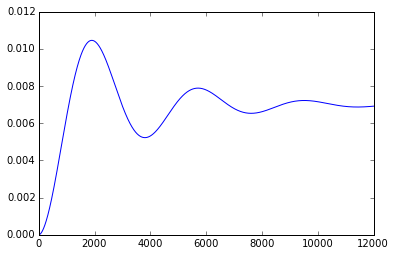

In [39]:
pyplot.plot(sh.transpose());

##### Fromt the graph above, we can see bacuse the material has the damping properity, the displacement of the 11th degree of freedom of the structure increase gradually. And the displace seem smooth which means the damping properity of material has damped out the energy.

In [40]:
print("with out dumping")

with out dumping


##### Now we drop the Damping Coefficiency of the Material Properity by time the CsumOk with 0

In [41]:
M=MsumOk
C=CsumOk*0
K=KsumOk
#+++++++++++++++++++++++++++++++++++++++++++++++
DOF=36
F=zeros(DOF,1) 

F[35]=1
F[32]=1
F[11]=1
F[14]=1

In [53]:
#print(C)

In [55]:
bup=zeros(36,1)
bdown=(M**-1)*F
#print("up=",bup)
#print("down=",bdown)

b=zeros(72,1)

for k in range(36):
    b[k]=bup[k]
#print(b)

for kk in range(36):
    b[kk+36]=bdown[kk]
#print(b)

In [56]:
aa=zeros(DOF,DOF)
#print(aa.shape)

bb=eye(DOF)
#print(bb)
#print(bb.shape)

cc=-1*(M** -1)*K
#print(cc.shape)

dd=-1*(M** -1)*C
#print(dd.shape)

In [54]:
#print(dd)

In [46]:
a=zeros(72,72)

for i in range(36):
    for j in range(36):
        a[i,j]=aa[i,j]
        
#print("a=",simplify(a))

for i in range(36):
    for j in range(36):
        a[i,j+36]=bb[i,j]
        
#print("a=",simplify(a))

for i in range(36):
    for j in range(36):
        a[i+36,j]=cc[i,j]
        
#print("a=",simplify(a))


for i in range(36):
    for j in range(36):
        a[i+36,j+36]=dd[i,j]
        
#print("a=",simplify(a))

##### The Following program is the interation part of the Numerical Method to do the Finite Element Simulation only with Mass Matrix and Stiffness Matrix.

In [47]:
dt=0.00006;
N=12000

NewU_V_Each=zeros(72,1)
NewU_V_Total=zeros(72,N)

for i in range(N):
    #print("i=",i)
    Newderivative=a * NewU_V_Each + b
   
    NewU_V_Each=NewU_V_Each+dt * Newderivative
    
    NewU_V_Total[:,i]=NewU_V_Each

In [48]:
import matplotlib.pyplot as plt
print(NewU_V_Total.shape)


ssh=NewU_V_Total.row(11)
#print(simplify(sh))
print(ssh.shape)

(72, 12000)
(1, 12000)


In [49]:
for i in range(399):
    if ssh[i]>ssh[i+1]:
        print("errot")

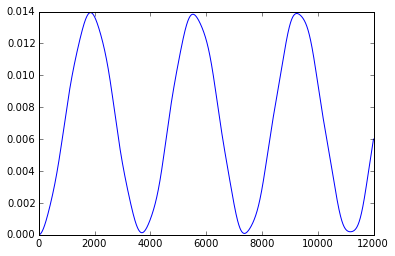

In [50]:
pyplot.plot(ssh.transpose());

##### Fromt the graph above, we can see bacuse of the material without the damping properity, the displacement of the 11th degree of freedom of the structure virbrate perodically . 